In [1]:
import wobble
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
data2 = wobble.Spectra('../data/unnormalized/51peg_e2ds.hdf5')
data3 = wobble.Spectra()

In [3]:
for n in tqdm(range(data2.N)):
    sp = data2.pop(0)
    sp.mask_low_pixels()
    sp.mask_bad_edges()   
    sp.transform_log()  
    sp.continuum_normalize()
    sp.mask_high_pixels()
    data3.append(sp)

100%|██████████| 91/91 [02:11<00:00,  1.50s/it]


In [5]:
data1 = wobble.Data('../data/unnormalized/51peg_e2ds.hdf5')

/Users/mbedell/python/wobble/wobble/data.py:120: RuntimeWarning: invalid value encountered in multiply
  self.ivars = [self.fluxes[i]**2 * self.flux_ivars[i] for i in range(self.R)] # ivars for log(fluxes)


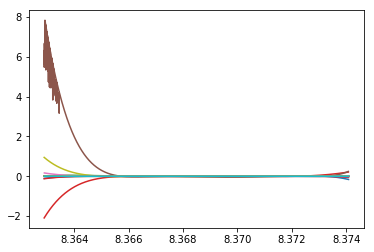

In [14]:
r = 10
for n in range(20):
    plt.plot(data1.xs[r][n], data1.ys[r][n] - data3.ys[r][n])

In [8]:
data3.write('../data/51peg_e2ds.hdf5')

In [9]:
data2 = wobble.Spectra('../data/unnormalized/barnards_e2ds.hdf5')
data3 = wobble.Spectra()

In [10]:
for n in tqdm(range(data2.N)):
    sp = data2.pop(0)
    sp.mask_low_pixels()
    sp.mask_bad_edges()   
    sp.transform_log()  
    sp.continuum_normalize()
    sp.mask_high_pixels()
    data3.append(sp)
data3.drop_bad_orders()
data3.drop_bad_epochs()

  0%|          | 1/306 [00:15<1:16:36, 15.07s/it]

  8%|▊         | 26/306 [02:37<35:37,  7.63s/it]

 26%|██▋       | 81/306 [06:04<14:26,  3.85s/it]/Users/mbedell/python/wobble/wobble/spectra.py:404: RuntimeWarning: invalid value encountered in sqrt
  self.ivars[r][window_start:window_end]))
/Users/mbedell/python/wobble/wobble/spectra.py:411: RuntimeWarning: invalid value encountered in sqrt
  self.ivars[r][window_start:window_end]))


 69%|██████▉   | 211/306 [15:07<05:49,  3.68s/it]

 72%|███████▏  | 219/306 [15:34<04:56,  3.41s/it]

 86%|████████▌ | 262/306 [18:14<02:44,  3.74s/it]

 91%|█████████ | 277/306 [19:30<02:02,  4.21s/it]

100%|██████████| 306/306 [21:22<00:00,  4.13s/it]


Data: Dropping orders [ 0  1  2  3  4  5  6  7 16] because they have average SNR < 5


In [11]:
data3.write('../data/barnards_e2ds.hdf5')

In [12]:
data1 = wobble.Data('../data/unnormalized/barnards_e2ds.hdf5', epochs=np.arange(20))

Data: Dropping orders [ 0  1  2  3  4  5  6  7 16] because they have average SNR < 5


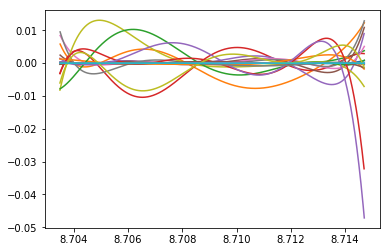

In [21]:
#plt.plot(sp.xs[r], sp.ys[r])
r = 50
for n in range(20):
    plt.plot(data1.xs[r][n], data1.ys[r][n] - data3.ys[r][n])